# Important Libraries

In [28]:
# !pip install nltk
# !pip install wordcloud
# !pip install yellowbrick
# !pip install scattertext
# !pip install networkx
#! pip install cufflinks --upgrade

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk.tokenize import word_tokenize
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import scipy.sparse
from sklearn.pipeline import FeatureUnion
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import LatentDirichletAllocation
import gensim.corpora
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import unicodedata
from sklearn.feature_extraction import DictVectorizer
from wordcloud import WordCloud
import scattertext as st
import spacy
import plotly.express as px
from pprint import pprint
import networkx as nx
from plotly.offline import iplot
import plotly.graph_objs as go
from sklearn import feature_extraction, model_selection, pipeline, manifold, preprocessing,feature_selection
import random
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from yellowbrick.text import TSNEVisualizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from tabulate import tabulate
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string, time
from sklearn import svm, ensemble, naive_bayes, neighbors
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, multilabel_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, cohen_kappa_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
import cufflinks as cf
from matplotlib import cm
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import joblib

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Preprocessig


In [29]:
df_recipes=pd.read_csv("/kaggle/input/recipes/food_recipes.csv")

In [30]:
df_recipes

,recipe_title,url,record_health,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,https://www.archanaskitchen.com/roasted-pepper...,good,434,4.958525,is a quicker version pizza to satisfy your cr...,Mexican,Dinner,Vegetarian,15 M,15 M,Tortillas|Extra Virgin Olive Oil|Garlic|Mozzar...,To begin making the Roasted Peppers And Mushro...,Divya Shivaraman,Party Food Recipes|Tea Party Recipes|Mushroom ...,Pizza Recipes
1,Thakkali Gotsu Recipe | Thakkali Curry | Spicy...,https://www.archanaskitchen.com/tomato-gotsu-r...,good,3423,4.932223,also known as the is a quick and easy to ma...,South Indian Recipes,Lunch,Vegetarian,10 M,20 M,Sesame (Gingelly) Oil|Mustard seeds (Rai/ Kadu...,To begin making Tomato Gotsu Recipe/ Thakkali ...,Archana Doshi,Vegetarian Recipes|Tomato Recipes|South Indian...,Indian Curry Recipes
2,Spicy Grilled Pineapple Salsa Recipe,https://www.archanaskitchen.com/spicy-grilled-...,good,2091,4.945959,Spicy Grilled Pineapple Salsa is a simple reci...,Mexican,Side Dish,Vegetarian,10 M,0 M,Extra Virgin Olive Oil|Pineapple|White onion|R...,To begin making the Spicy Grilled Pineapple Sa...,Archana's Kitchen,Party Starter & Appetizer Recipes|Pineapple Re...,Mexican Recipes
3,Karwar Style Dali Thoy Recipe - Toor dal Curry,https://www.archanaskitchen.com/dali-thoy-reci...,good,990,4.888889,The is a quintessential of Konkani dish whic...,Coastal Karnataka,Side Dish,High Protein Vegetarian,5 M,20 M,Arhar dal (Split Toor Dal)|Turmeric powder (Ha...,To prepare Karwar Style Dali Thoy Recipe (Toor...,Jyothi Rajesh,Side Dish Recipes|South Indian Recipes|Indian ...,Indian Curry Recipes
4,Rajma Kofta In Milk And Poppy Seed Gravy Recipe,https://www.archanaskitchen.com/rajma-kofta-in...,good,345,4.828986,Koftas are traditional Indian recipes mostly w...,North Indian Recipes,Side Dish,High Protein Vegetarian,20 M,30 M,Rajma (Large Kidney Beans)|Cashew nuts|Sultana...,To begin making Rajma Kofta In Milk And Poppy ...,RUBY PATHAK,Side Dish Recipes|Indian Lunch Recipes|Office ...,Kofta Recipes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8004,Zucchini and Carrot Pasta Recipe,https://www.archanaskitchen.com/zucchini-and-c...,good,738,4.934959,is a healthy recipe which can be served over ...,Italian Recipes,Dinner,Vegetarian,10 M,30 M,Spirali pasta|Onions|Tomatoes|Green zucchini|C...,To begin with Zucchini And Carrot Pasta Recipe...,Aarti Sharma,Vegetarian Recipes|Carrot Recipes|Zucchini Rec...,Pasta Recipes
8005,Hyderabadi Khatti Dal Recipe (Hyderabadi Tangy...,https://www.archanaskitchen.com/hyderabadi-kha...,good,5173,4.903151,Hyderabadi Khatti Dal is a delicious tangy dal...,Hyderabadi,Lunch,High Protein Vegetarian,20 M,40 M,Arhar dal (Split Toor Dal)|Tomato|Turmeric pow...,To begin making the Hyderabadi Khatti Dal Reci...,Farrukh Aziz Ansari,Gluten Free Recipes|Indian Diabetic Recipes,Indian Curry Recipes
8006,Karwar Style Muga Ambat Recipe (Moong Sprouts ...,https://www.archanaskitchen.com/karwar-style-m...,good,1202,4.946755,is a curry recipe made from 'Muga' - which re...,Karnataka,Side Dish,High Protein Vegetarian,10 M,15 M,Turmeric powder (Haldi)|Sugar|Salt|Fresh cocon...,To prepare Karwar Style Muga Ambat Recipe (Moo...,Archana's Kitchen,High Protein Vegetarian Diet Recipes|South Ind...,Indian Curry Recipes
8007,"Beetroot, Amla And Pudina Juice Recipe | Mint ...",https://www.archanaskitchen.com/beetroot-amla-...,good,1305,4.925670,is a healthy juice recipe which acts as a gre...,Indian,Snack,Vegetarian,10 M,0 M,Beetroot|Amla (Nellikai/ Gooseberry)|Mint Leav...,"To begin making the Beetroot, Amla And Pudina...",Archana's Kitchen,Healthy Recipes|Beetroot Recipes|Pudina Mint R...,Indian Drink Recipes


In [31]:
# Checking the basic information of the dataframe
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8009 entries, 0 to 8008
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recipe_title   8009 non-null   object 
 1   url            8009 non-null   object 
 2   record_health  8009 non-null   object 
 3   vote_count     8009 non-null   int64  
 4   rating         8009 non-null   float64
 5   description    7994 non-null   object 
 6   cuisine        7943 non-null   object 
 7   course         7854 non-null   object 
 8   diet           7858 non-null   object 
 9   prep_time      7979 non-null   object 
 10  cook_time      7979 non-null   object 
 11  ingredients    7997 non-null   object 
 12  instructions   8009 non-null   object 
 13  author         8009 non-null   object 
 14  tags           7930 non-null   object 
 15  category       8009 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 1001.2+ KB


In [32]:
# Check if all missing values have been filled
df_recipes.isnull().sum()

recipe_title       0
url                0
record_health      0
vote_count         0
rating             0
description       15
cuisine           66
course           155
diet             151
prep_time         30
cook_time         30
ingredients       12
instructions       0
author             0
tags              79
category           0
dtype: int64

In [33]:
# Function to detect non-English text
def is_english(text):
    try:
        text.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

# Apply the function to 'recipe_title' column and replace non-English titles with 'Non-English'
df_recipes.loc[df_recipes['recipe_title'].apply(is_english) == False, 'recipe_title'] = 'Non-English'

In [34]:
# Check how many 'Non-English' titles we have
df_recipes['recipe_title'].value_counts()['Non-English']

1291

In [35]:
# Remove rows with 'Non-English' in 'recipe_title'
df_recipes = df_recipes[df_recipes['recipe_title'] != 'Non-English']

# Check the number of remaining entries in the dataframe
df_recipes.shape[0]

6718

In [36]:
# Drop rows with any null values
df_recipes = df_recipes.dropna()

# Check the number of remaining entries in the dataframe
df_recipes.shape[0]

6425

In [37]:
# Function to convert time to minutes
def convert_to_minutes(time_str):
    if pd.isnull(time_str):
        return None
    return int(time_str.split()[0])

# Apply the function to 'prep_time' and 'cook_time' columns
df_recipes['prep_time'] = df_recipes['prep_time'].apply(convert_to_minutes)
df_recipes['cook_time'] = df_recipes['cook_time'].apply(convert_to_minutes)

# Check the first few rows of the DataFrame
df_recipes[['prep_time', 'cook_time']].head()

,prep_time,cook_time
0,15,15
1,10,20
2,10,0
3,5,20
4,20,30


In [38]:
# Function to preprocess text with '|' as a separator
def preprocess_text_with_bar(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation except '|'
    text = text.translate(str.maketrans('', '', string.punctuation.replace('|', '')))
    # Remove extra white spaces
    text = '|'.join([word.strip() for word in text.split('|')])
    return text

# Preprocess 'ingredients' column
df_recipes['ingredients'] = df_recipes['ingredients'].apply(preprocess_text_with_bar)

In [39]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra white spaces
    text = ' '.join(text.split())
    return text

# Apply the function to 'cuisine' column
df_recipes['cuisine'] = df_recipes['cuisine'].apply(preprocess_text)

df_recipes['cuisine'] = df_recipes['cuisine'].str.replace('recipes', '', case=False)


In [40]:
# Check the first few rows of the DataFrame
df_recipes[['cuisine', 'ingredients']].head()

,cuisine,ingredients
0,mexican,tortillas|extra virgin olive oil|garlic|mozzar...
1,south indian,sesame gingelly oil|mustard seeds rai kadugu|c...
2,mexican,extra virgin olive oil|pineapple|white onion|r...
3,coastal karnataka,arhar dal split toor dal|turmeric powder haldi...
4,north indian,rajma large kidney beans|cashew nuts|sultana r...


In [41]:
df_cleaned = df_recipes.copy()

# Data Visualaizations

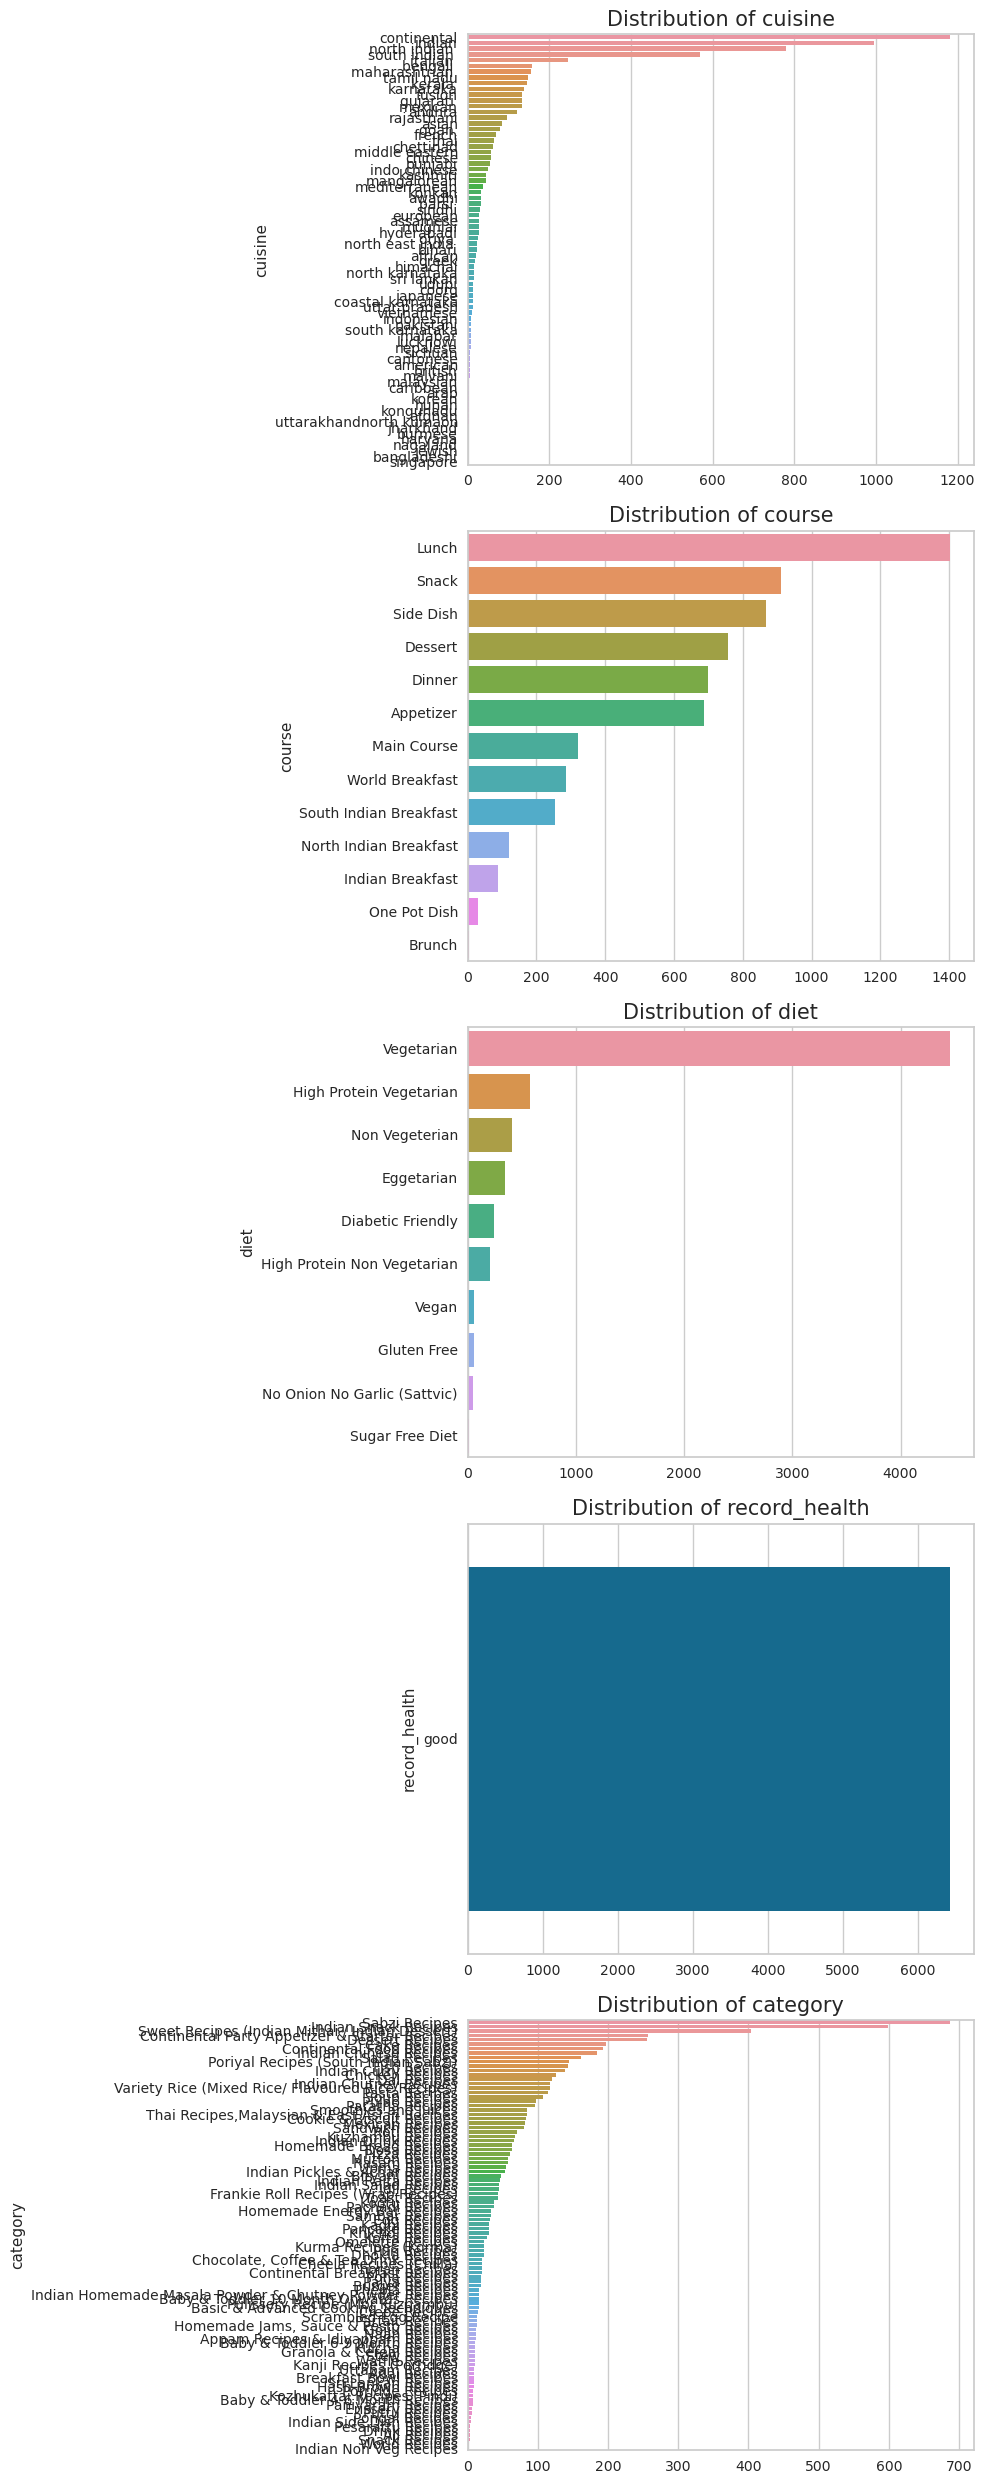

In [42]:
# List of categorical columns to check
cat_cols = ['cuisine', 'course', 'diet', 'record_health', 'category']

fig, axs = plt.subplots(nrows=len(cat_cols), figsize=(10,25))

# Plot countplot for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(y=col, data=df_cleaned, order = df_cleaned[col].value_counts().index, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}', fontsize=15)
    axs[i].set_xlabel('')

plt.tight_layout()
plt.show()

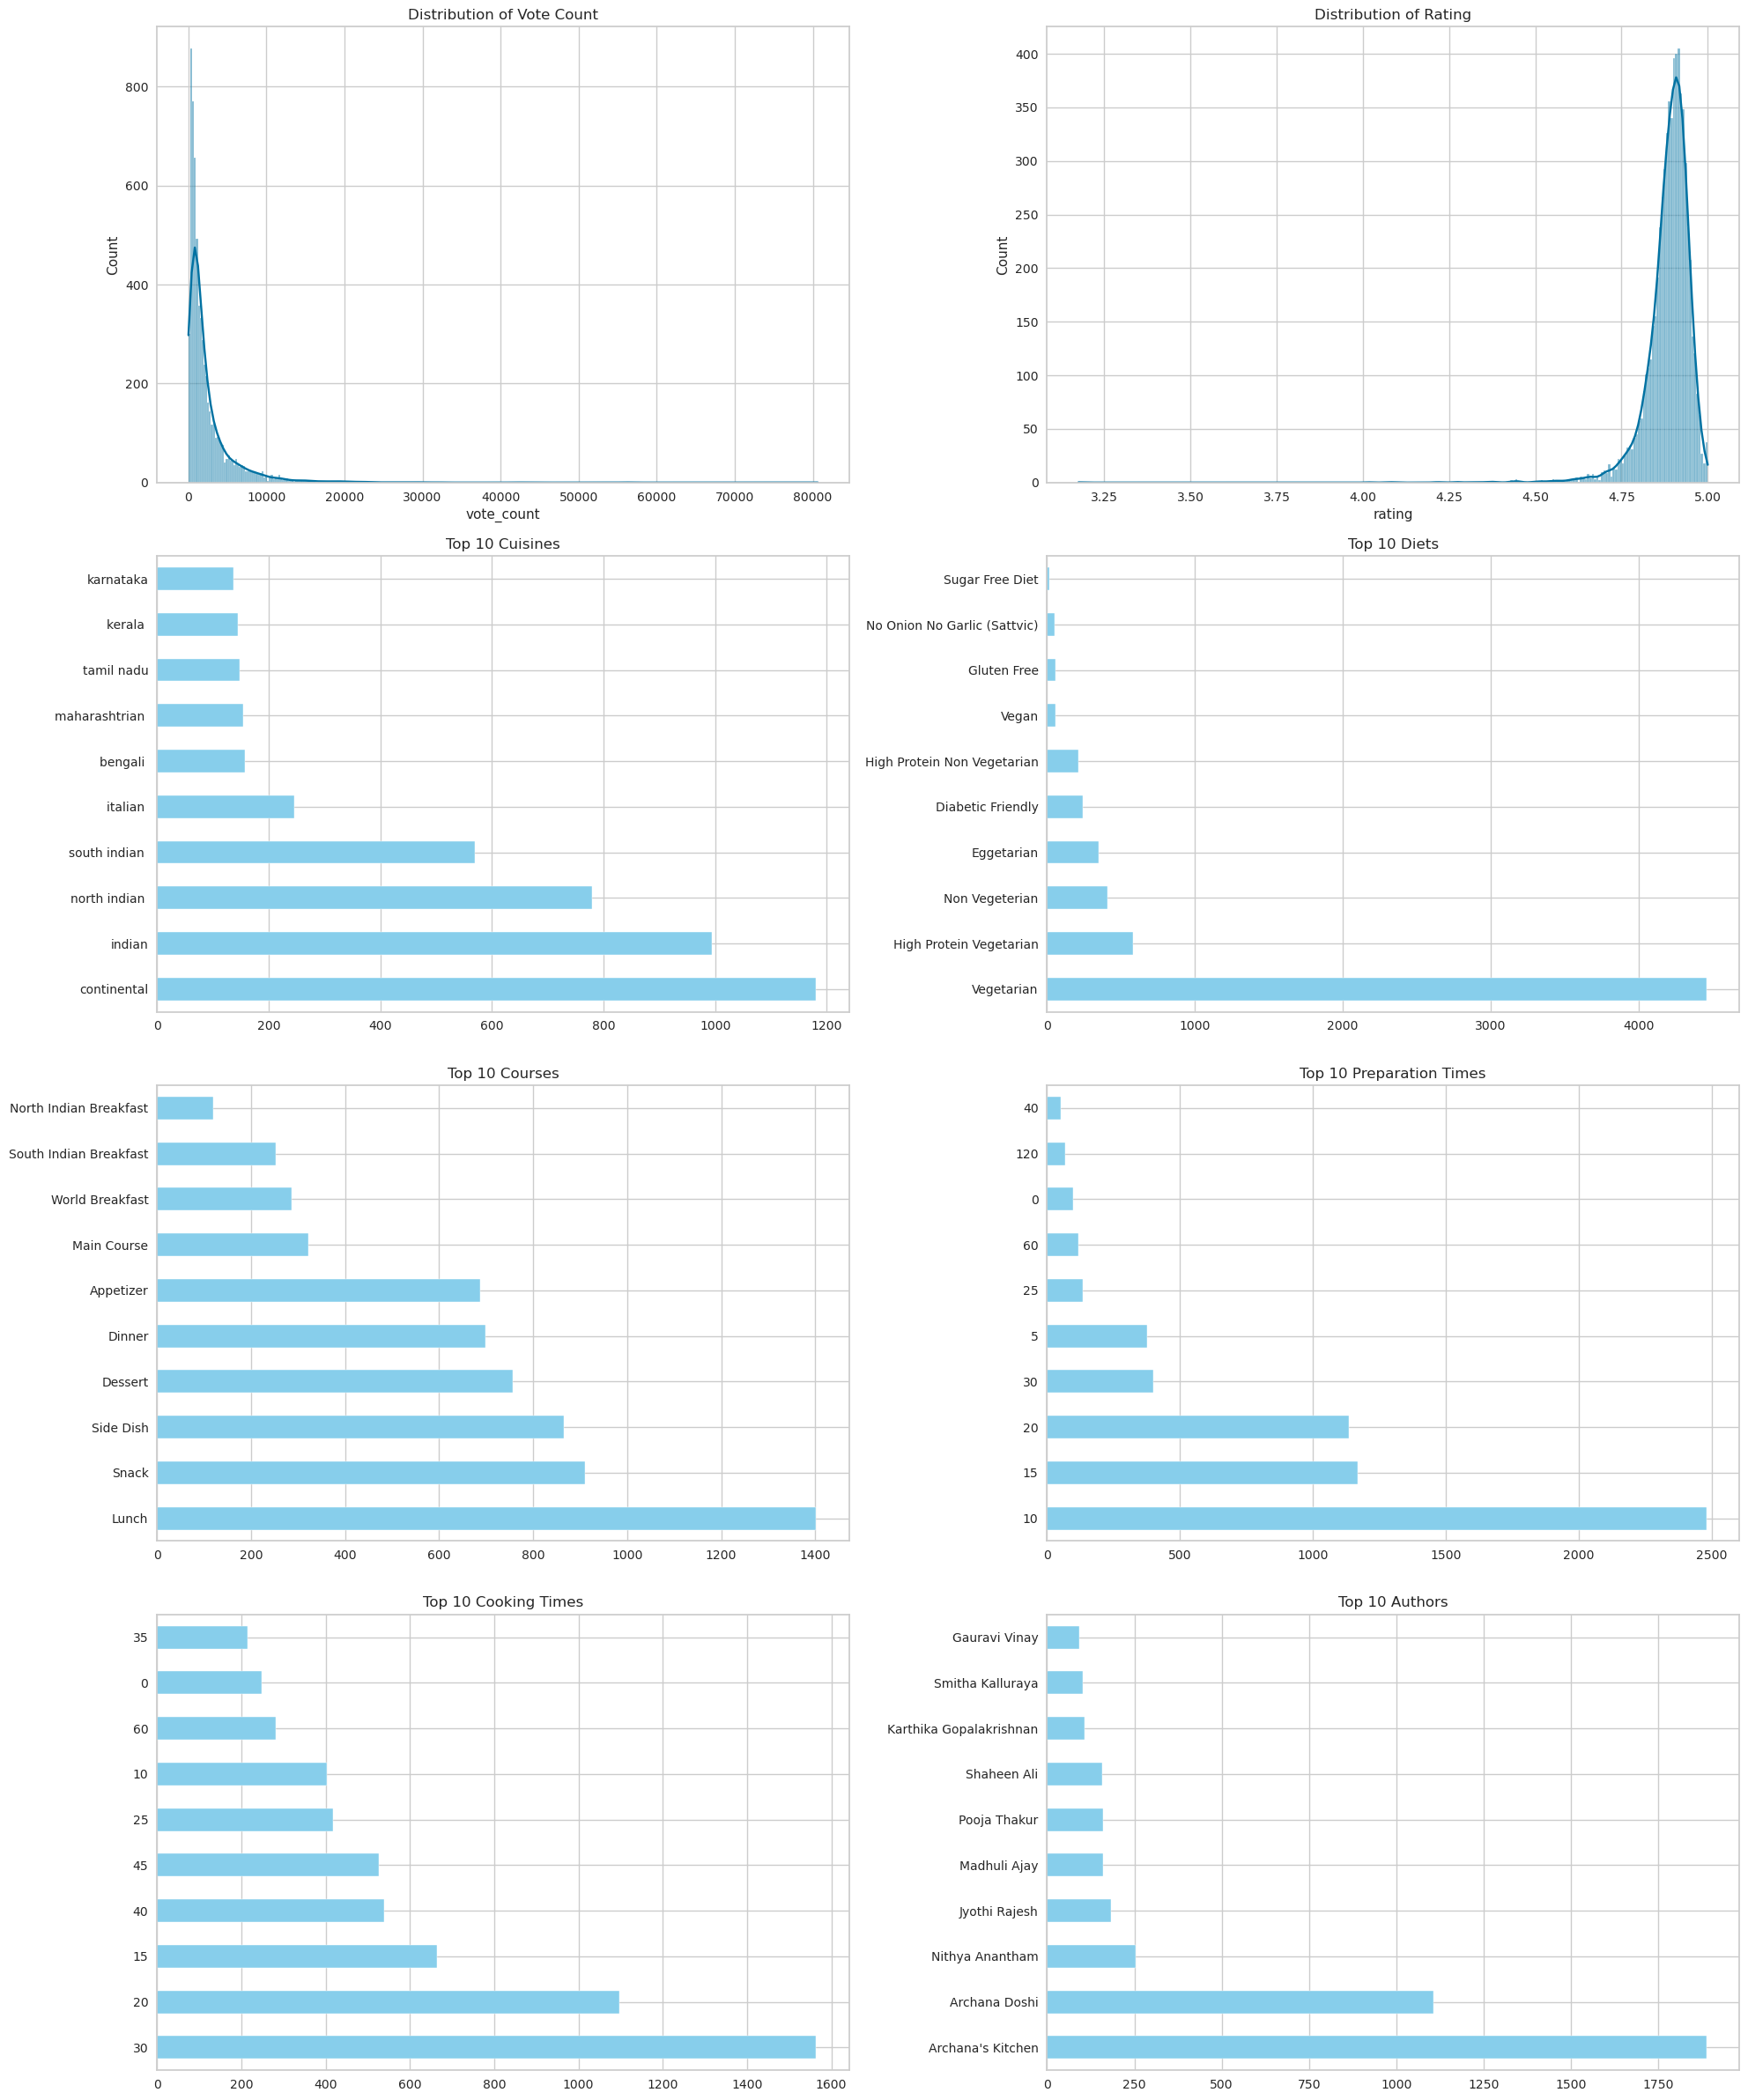

In [43]:
# Set the style of the plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 24))

# Distribution of vote_count
sns.histplot(data=df_cleaned, x="vote_count", kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Vote Count')

# Distribution of rating
sns.histplot(data=df_cleaned, x="rating", kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Rating')

# Top cuisines
df_cleaned['cuisine'].value_counts()[:10].plot(kind='barh', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Top 10 Cuisines')

# Top diets
df_cleaned['diet'].value_counts()[:10].plot(kind='barh', ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Top 10 Diets')

# Top courses
df_cleaned['course'].value_counts()[:10].plot(kind='barh', ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title('Top 10 Courses')

# Top prep times
df_cleaned['prep_time'].value_counts()[:10].plot(kind='barh', ax=axes[2, 1], color='skyblue')
axes[2, 1].set_title('Top 10 Preparation Times')

# Top cook times
df_cleaned['cook_time'].value_counts()[:10].plot(kind='barh', ax=axes[3, 0], color='skyblue')
axes[3, 0].set_title('Top 10 Cooking Times')

# Top authors
df_cleaned['author'].value_counts()[:10].plot(kind='barh', ax=axes[3, 1], color='skyblue')
axes[3, 1].set_title('Top 10 Authors')

plt.tight_layout()
plt.show()

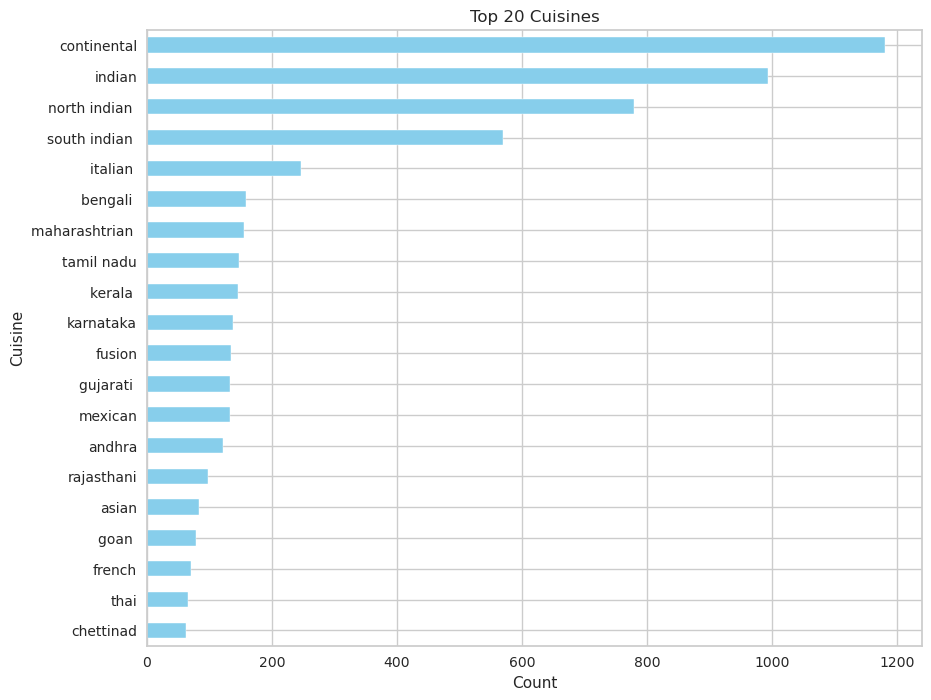

In [44]:
# Create a plot for the top 20 cuisines
plt.figure(figsize=(10,8))
df_cleaned['cuisine'].value_counts()[:20].plot(kind='barh', color='skyblue')
plt.title('Top 20 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.gca().invert_yaxis()
plt.show()

In [45]:
# Create a new column 'for_ngrams' by replacing '|' with ' ' in 'ingredients'
df_cleaned['for_ngrams'] = df_cleaned['ingredients'].str.replace('|', ' ')

In [46]:
# Define the function to generate n-grams
def generate_ngrams(text, n):
    words = text.split(' ')
    iterations = len(words) - n + 1
    for i in range(iterations):
        yield words[i:i + n]

# Define the function to create network diagram for two selected cuisines
def net_diagram(*cuisines):
    ngrams = {}
    for title in df_cleaned[df_cleaned.cuisine == cuisines[0]]['for_ngrams']:
        for ngram in generate_ngrams(title, 2):
            ngram = ','.join(ngram)
            if ngram in ngrams:
                ngrams[ngram] += 1
            else:
                ngrams[ngram] = 1

    ngrams_df1 = pd.DataFrame.from_dict(ngrams, orient='index')
    ngrams_df1.columns = ['count']
    ngrams_df1['cuisine'] = cuisines[0]
    ngrams_df1.reset_index(level=0, inplace=True)

    ngrams = {}
    for title in df_cleaned[df_cleaned.cuisine == cuisines[1]]['for_ngrams']:
        for ngram in generate_ngrams(title, 2):
            ngram = ','.join(ngram)
            if ngram in ngrams:
                ngrams[ngram] += 1
            else:
                ngrams[ngram] = 1

    ngrams_df2 = pd.DataFrame.from_dict(ngrams, orient='index')
    ngrams_df2.columns = ['count']
    ngrams_df2['cuisine'] = cuisines[1]
    ngrams_df2.reset_index(level=0, inplace=True)

    cuisine1 = ngrams_df1.sort_values('count', ascending=False)[:25]
    cuisine2 = ngrams_df2.sort_values('count', ascending=False)[:25]
    df_final = pd.concat([cuisine1, cuisine2])

    g = nx.from_pandas_edgelist(df_final, source='cuisine', target='index')

    cmap = plt.cm.RdYlGn
    colors = [n for n in range(len(g.nodes()))]
    k = 0.35
    pos = nx.spring_layout(g, k=k)
    node_size_new = df_final['count'].values*15

    nx.draw_networkx(g, pos, node_size=node_size_new[:len(pos)], cmap=cmap, node_color=colors, edge_color='grey', font_size=15, width=3)
    plt.title(f"Top 25 Bigrams for {cuisines[0]} and {cuisines[1]}", fontsize=30)
    plt.gcf().set_size_inches(30, 30)
    plt.show()
    plt.savefig('network.png')

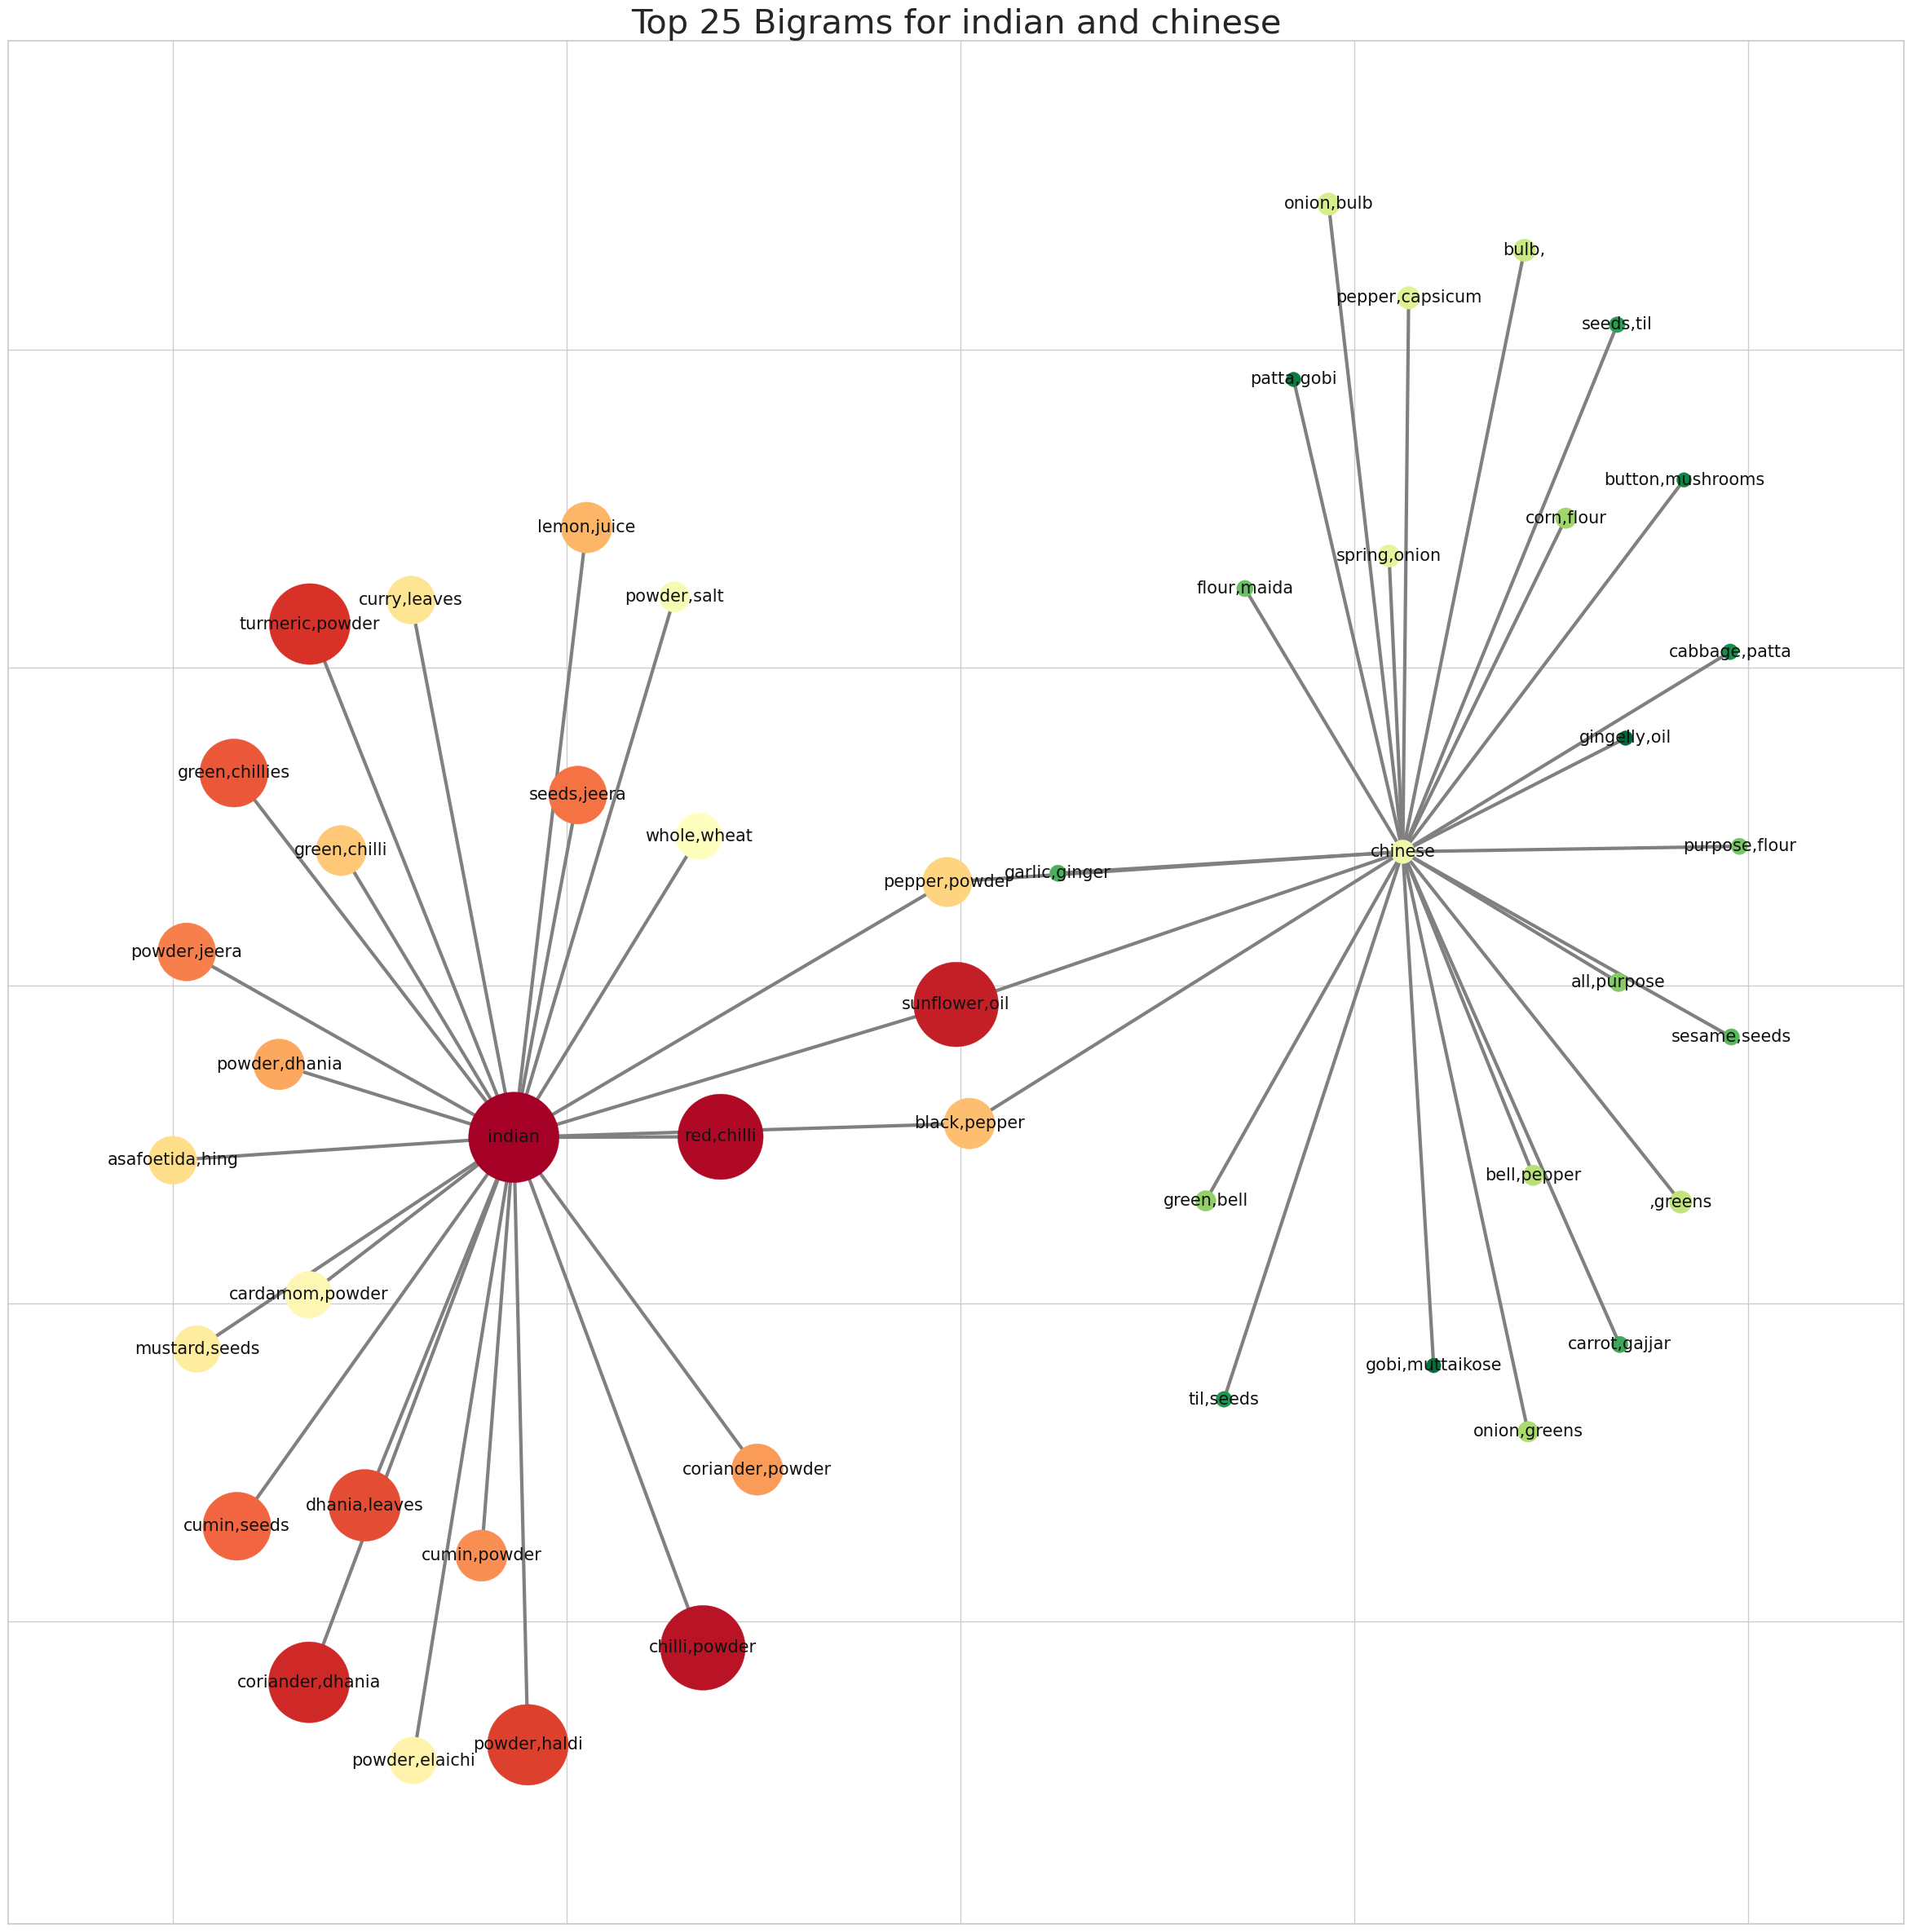

<Figure size 800x550 with 0 Axes>

In [47]:
# Create network diagram for 'indian' and 'chinese' cuisines
net_diagram('indian', 'chinese')

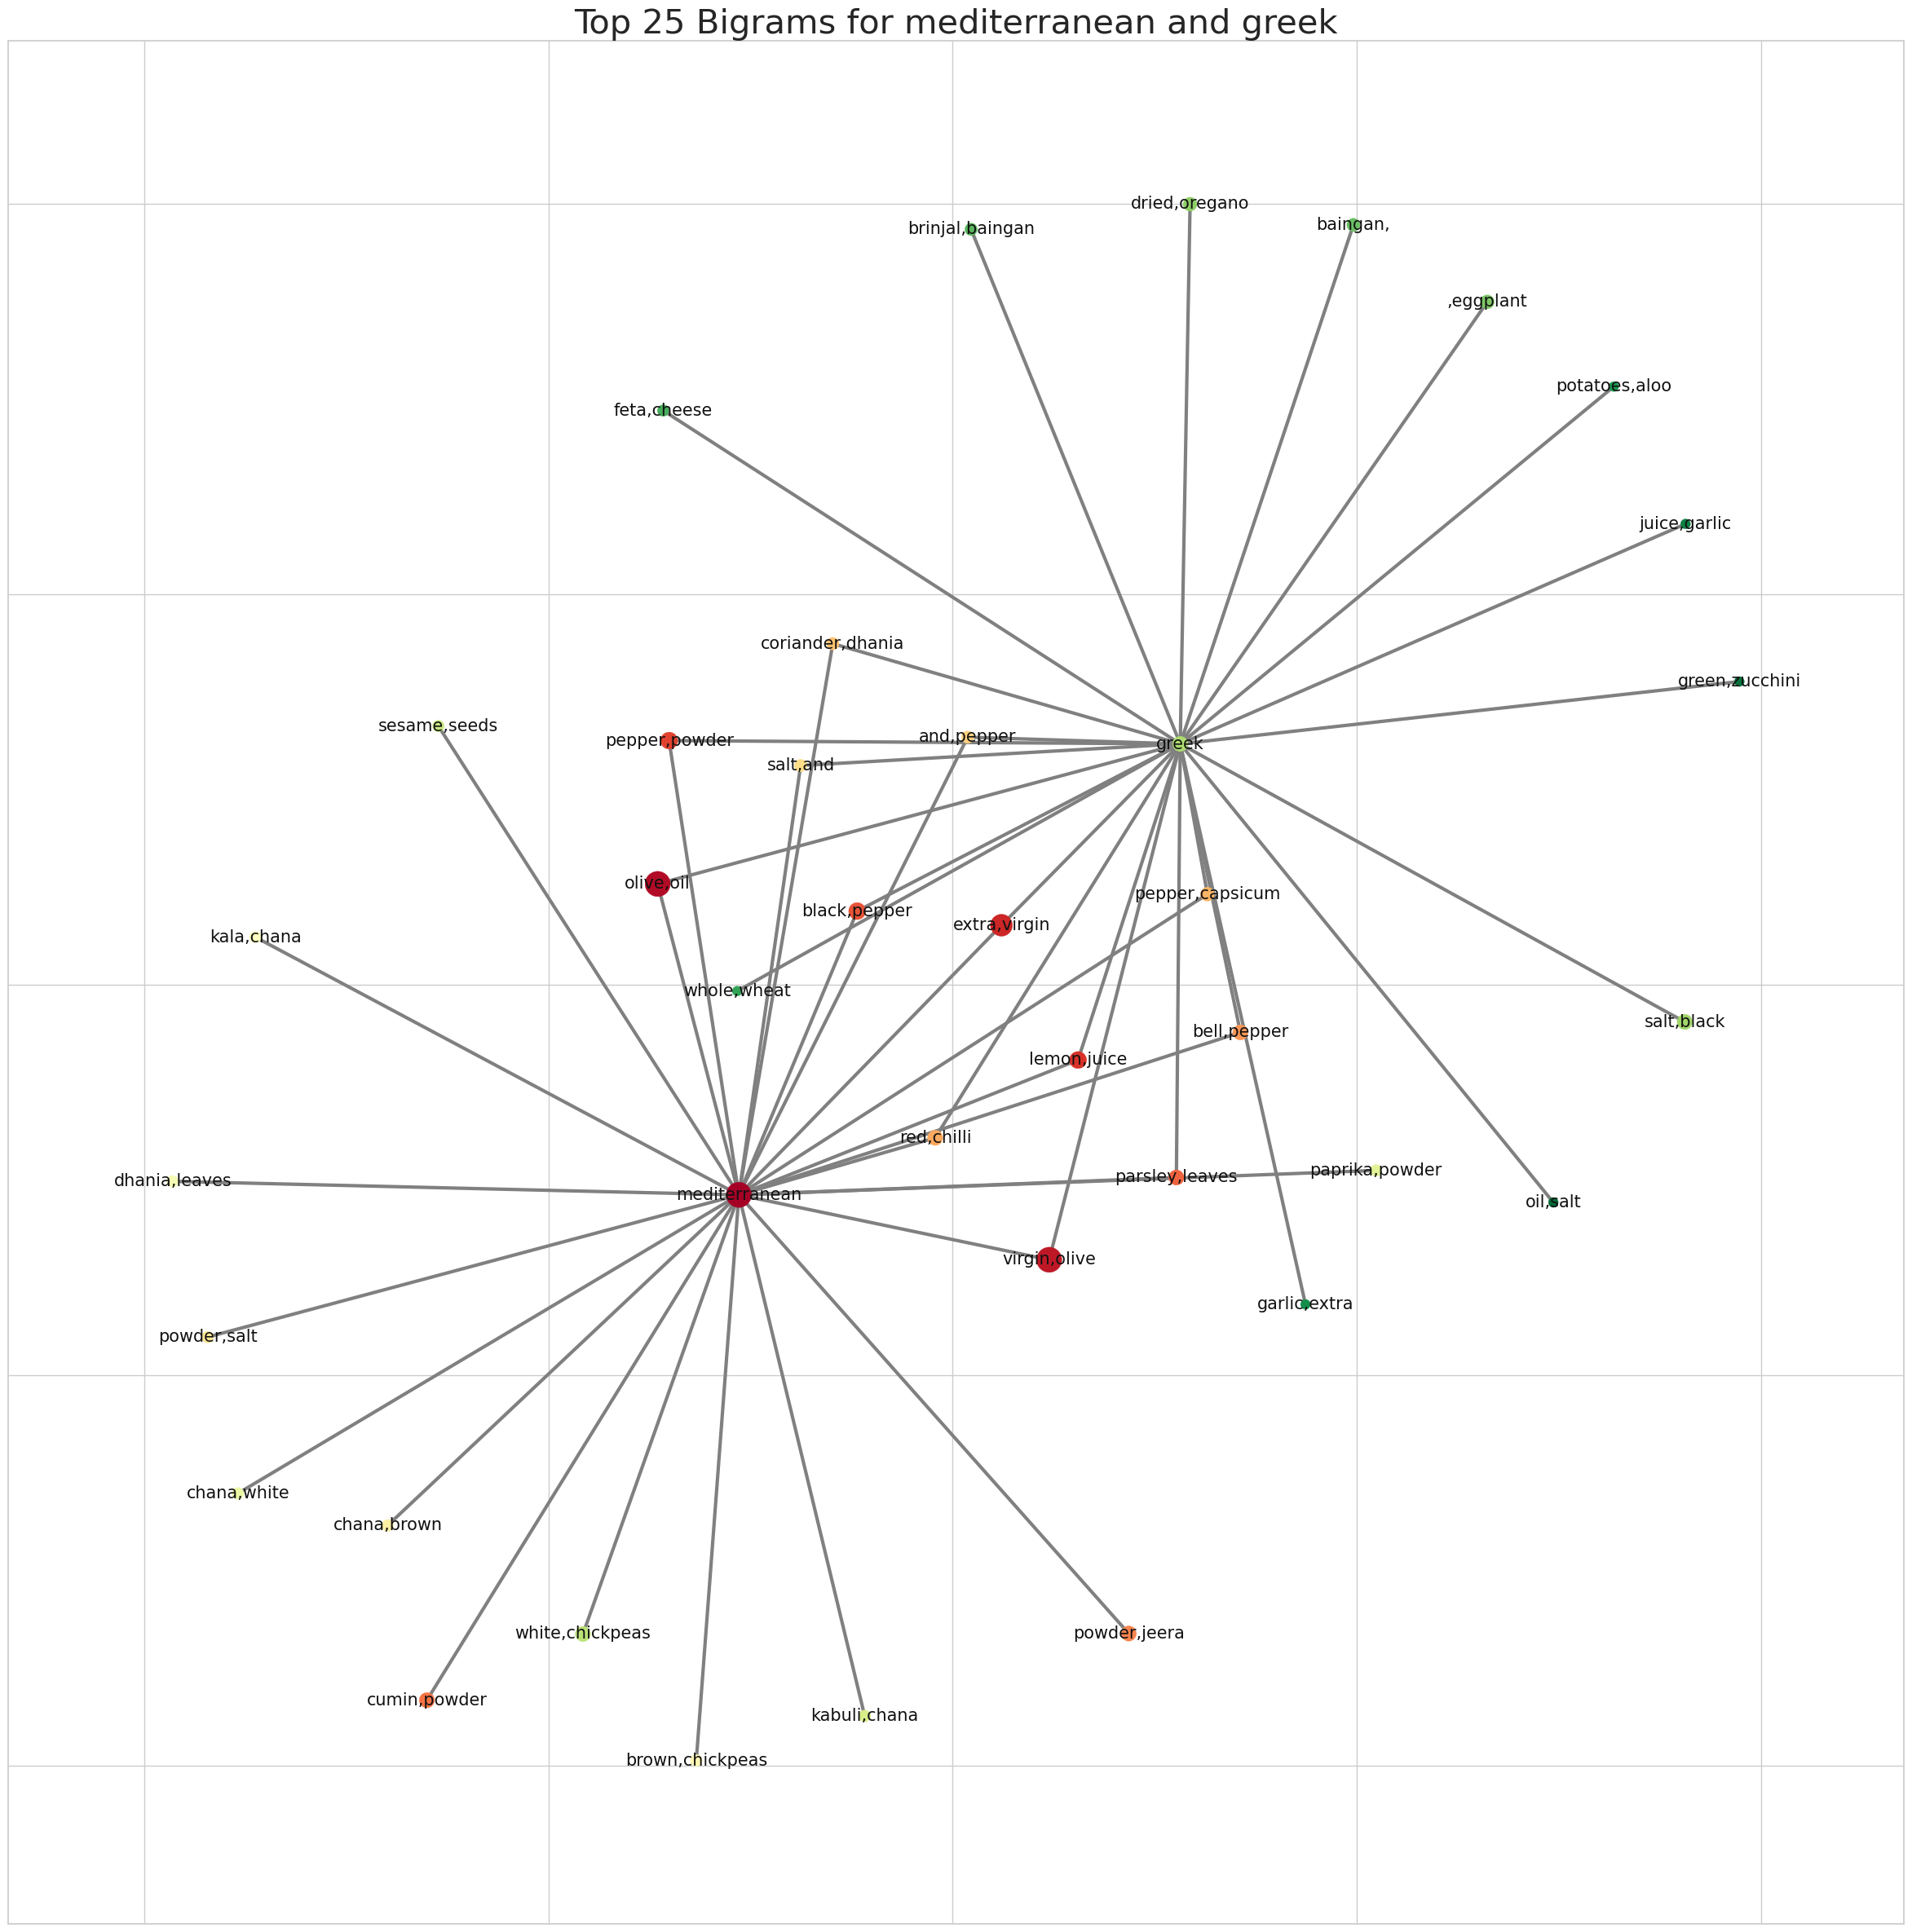

<Figure size 800x550 with 0 Axes>

In [48]:
net_diagram('mediterranean','greek')

### Merge Cuisines

In [49]:
df_cleaned = df_cleaned[df_cleaned['cuisine'] != 'israeli']

In [50]:
# Define a dictionary to map the existing cuisines to the new, aggregated categories
cuisine_mapping = {
    'Indian': ['north indian', 'south indian', 'maharashtrian', 'rajasthani', 'gujarati', 'punjabi', 'goan', 'indian'],
    'Asian': ['chinese', 'thai', 'japanese', 'asian recipes', 'vietnamese', 'korean', 'indonesian', 'malaysian', 'singaporean', 'sri lankan', 'filipino'],
    'European': ['italian', 'french', 'british', 'greek', 'spanish', 'german', 'portuguese', 'european', 'mediterranean', 'russian', 'swiss'],
    'American': ['mexican', 'continental', 'american', 'south american', 'canadian'],
    'Middle Eastern': ['lebanese', 'persian', 'turkish', 'arab', 'middle eastern'],
}

# Define a function to map the cuisines
def map_cuisine(cuisine):
    for category, cuisines in cuisine_mapping.items():
        if cuisine in cuisines:
            return category
    return 'Others'

# Apply the mapping function to the 'cuisine' column
df_cleaned['cuisine_agg'] = df_cleaned['cuisine'].apply(map_cuisine)

# Display the first few rows of the dataframe
df_cleaned[['cuisine', 'cuisine_agg']].head()

,cuisine,cuisine_agg
0,mexican,American
1,south indian,Others
2,mexican,American
3,coastal karnataka,Others
4,north indian,Others


In [51]:
# Count the number of recipes in each updated merged cuisine
final_merged_cuisine_counts = df_cleaned['cuisine'].value_counts()
final_merged_cuisine_counts

continental      1181
indian            994
north indian      779
south indian      570
italian           246
                 ... 
haryana             2
nagaland            2
jewish              1
bangladeshi         1
singapore           1
Name: cuisine, Length: 75, dtype: int64

In [52]:
# Drop the cuisines that have less than 5 recipes
df_cleaned = df_cleaned[~df_cleaned['cuisine'].isin(final_merged_cuisine_counts[final_merged_cuisine_counts < 5].index)]

# Count the number of recipes in each final merged cuisine after filtering
final_filtered_cuisine_counts = df_cleaned['cuisine'].value_counts()
final_filtered_cuisine_counts

continental          1181
indian                994
north indian          779
south indian          570
italian               246
bengali               158
maharashtrian         155
tamil nadu            148
kerala                145
karnataka             137
fusion                134
mexican               133
gujarati ﻿            133
andhra                121
rajasthani             97
asian                  84
goan                   79
french                 70
thai                   65
chettinad              63
middle eastern         58
chinese                56
punjabi                54
indo chinese           51
kashmiri               45
mangalorean            44
mediterranean          38
awadhi                 33
parsi                  33
konkan                 33
sindhi                 30
european               29
assamese               28
hyderabadi             27
mughlai                27
oriya                  25
north east india       24
bihari                 22
african     

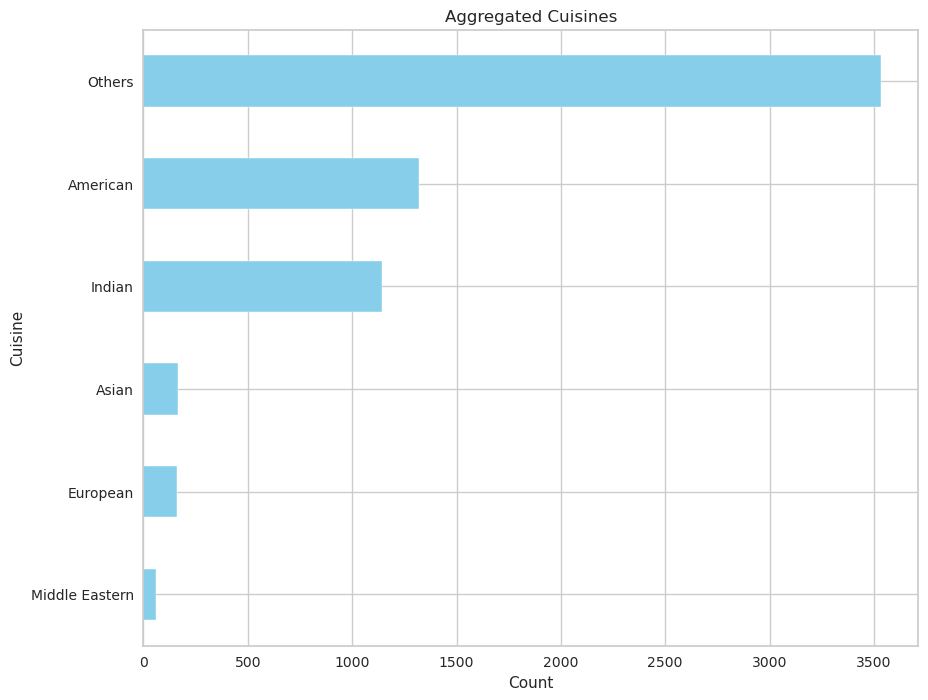

In [53]:
# Create a plot for the aggregated cuisines
plt.figure(figsize=(10,8))
df_cleaned['cuisine_agg'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Aggregated Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.gca().invert_yaxis()
plt.show()

In [54]:
# Remove rows with 'Others' as the cuisine
data_clean_no_others = df_cleaned[df_cleaned['cuisine_agg'] != 'Others']

In [55]:
# Define a dictionary to map the existing courses to the new, aggregated categories
course_mapping = {
    'Main Course': ['Main Course', 'Dinner', 'Lunch', 'Breakfast'],
    'Dessert': ['Dessert', 'Sweet'],
    'Starter': ['Appetizer', 'Starter', 'Soup'],
    'Snack': ['Snack', 'Tea Time Snack'],
    'Beverage': ['Drink', 'Beverage', 'Cocktail'],
    # Add more mappings as needed
}

# Define a function to map the courses
def map_course(course):
    for category, courses in course_mapping.items():
        if course in courses:
            return category
    return 'Others'  # If the course doesn't fit into any defined category, label it as 'Others'

# Apply the mapping function to the 'course' column
data_clean_no_others['course_agg'] = data_clean_no_others['course'].apply(map_course)

# Remove rows where the course is 'Others'
data_clean_no_others = data_clean_no_others[data_clean_no_others['course_agg'] != 'Others']

# Display the distribution of the new course categories
data_clean_no_others['course_agg'].value_counts()

Main Course    741
Snack          518
Dessert        489
Starter        438
Name: course_agg, dtype: int64

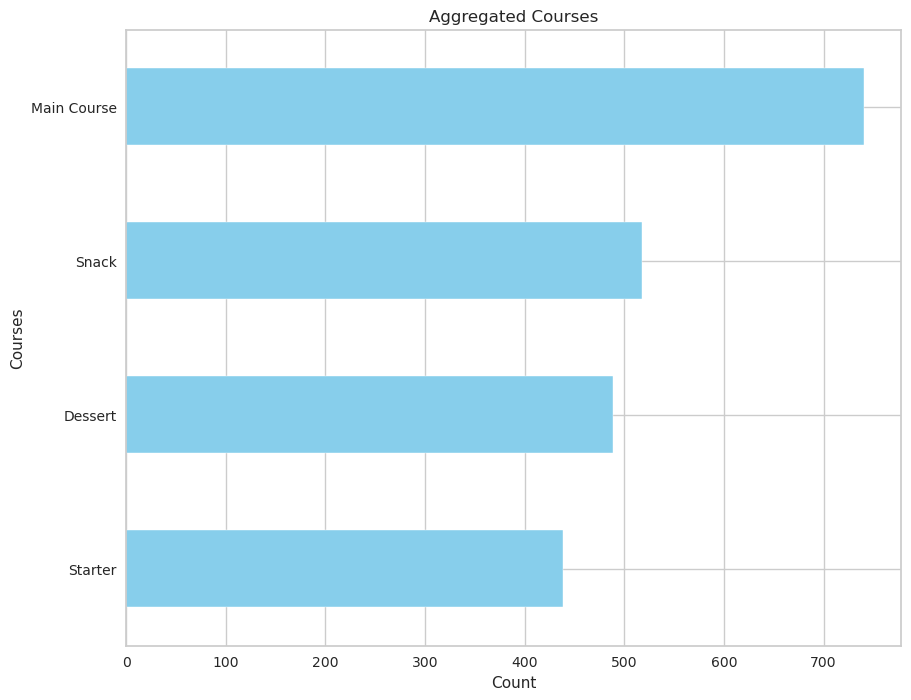

In [56]:
# Create a plot for the aggregated cuisines
plt.figure(figsize=(10,8))
data_clean_no_others['course_agg'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Aggregated Courses')
plt.xlabel('Count')
plt.ylabel('Courses')
plt.gca().invert_yaxis()
plt.show()

In [57]:
# Function to clean the ingredients
def clean_ingredients(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove extra spaces
    text = text.strip()
    text = re.sub(' +', ' ', text)
    
    return text

# Apply the cleaning function to the 'ingredients' column
data_clean_no_others['ingredients_cleaned'] = data_clean_no_others['ingredients'].apply(clean_ingredients)

# Display the first few rows of the cleaned ingredients
data_clean_no_others[['ingredients', 'ingredients_cleaned']].head()

,ingredients,ingredients_cleaned
0,tortillas|extra virgin olive oil|garlic|mozzar...,tortillasextra virgin olive oilgarlicmozzarell...
5,barnyard millet|oil|bay leaf tej patta|cardamo...,barnyard milletoilbay leaf tej pattacardamom e...
9,butter unsalted|caster sugar|whole eggs|all pu...,butter unsaltedcaster sugarwhole eggsall purpo...
11,butter salted|garlic|green chillies|onion|gree...,butter saltedgarlicgreen chilliesoniongreen ca...
12,shrimps|butter salted|orange color|lemon juice...,shrimpsbutter saltedorange colorlemon juicehon...


In [58]:
# Drop specified columns from the DataFrame and assign it to a new DataFrame
df_final = data_clean_no_others[['recipe_title', 'description', 'cuisine', 'course', 'diet', 'prep_time', 'cook_time', 'ingredients', 'instructions', 'category', 'cuisine_agg', 'course_agg', 'ingredients_cleaned']].copy()

# Reset the index of the DataFrame
df_final.reset_index(drop=True, inplace=True)
# Display the first few rows of the new DataFrame
df_final.head()

,recipe_title,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,category,cuisine_agg,course_agg,ingredients_cleaned
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,is a quicker version pizza to satisfy your cr...,mexican,Dinner,Vegetarian,15,15,tortillas|extra virgin olive oil|garlic|mozzar...,To begin making the Roasted Peppers And Mushro...,Pizza Recipes,American,Main Course,tortillasextra virgin olive oilgarlicmozzarell...
1,Barnyard Millet Mushroom Biryani Recipe,is a flavorful one pot preparation made with ...,indian,Lunch,Vegetarian,10,30,barnyard millet|oil|bay leaf tej patta|cardamo...,To begin making the Barnyard Millet Mushroom B...,Biryani Recipes,Indian,Main Course,barnyard milletoilbay leaf tej pattacardamom e...
2,Pineapple Upside Down Cake Recipe,The Classic Pineapple Upside Down Cake is simp...,continental,Dessert,Vegetarian,20,40,butter unsalted|caster sugar|whole eggs|all pu...,To begin making the Pineapple Upside Down cake...,Cake Recipes,American,Dessert,butter unsaltedcaster sugarwhole eggsall purpo...
3,Cheesy Rice Poppers Recipe,Cheesy Rice Poppers Recipe is a lovely finger ...,continental,Dinner,Vegetarian,10,10,butter salted|garlic|green chillies|onion|gree...,To begin making the Cheesy Rice Poppers Recipe...,Continental Party Appetizer & Starter Recipes,American,Main Course,butter saltedgarlicgreen chilliesoniongreen ca...
4,Savory Shrimps On Skillet Recipe,Savory Shrimps on skillet is a recipe where sh...,indian,Appetizer,Non Vegeterian,20,8,shrimps|butter salted|orange color|lemon juice...,To begin making the Savory Shrimps On Skillet ...,Fish Recipes,Indian,Starter,shrimpsbutter saltedorange colorlemon juicehon...


# Text Feature Engineering

### TFIDF

In [59]:
def plot_TSNE(data, labels):
    colormap = cm.get_cmap('tab20', len(np.unique(labels)))

    tsne = TSNEVisualizer(colors=colormap.colors)
    tsne.fit(data, labels)
    plt.xlabel("TSNE x")
    plt.ylabel("TSNE y")
    tsne.show()

In [60]:
# TF-IDF for textual columns
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
# description_tfidf = tfidf_vectorizer.fit_transform(df_final['description'])
ingredients_tfidf = tfidf_vectorizer.fit_transform(df_final['ingredients_cleaned'])
# instructions_tfidf = tfidf_vectorizer.fit_transform(df_final['instructions'])

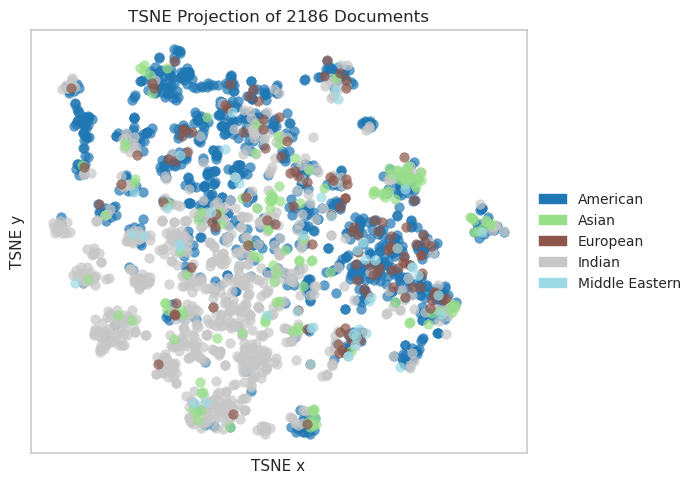

In [61]:
plot_TSNE(ingredients_tfidf,df_final['cuisine_agg'])

In [62]:
def TFIDF():
    tv = TfidfVectorizer()
    tv_matrix = tv.fit_transform(df_final['ingredients'])
    tv_matrix = tv_matrix.toarray()
    vocab = tv.get_feature_names_out()
    data = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
    return data

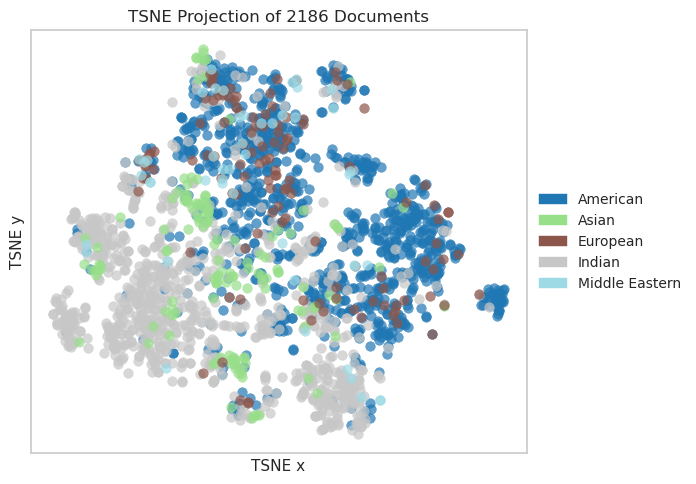

In [63]:
plot_TSNE(TFIDF(),df_final['cuisine_agg'])

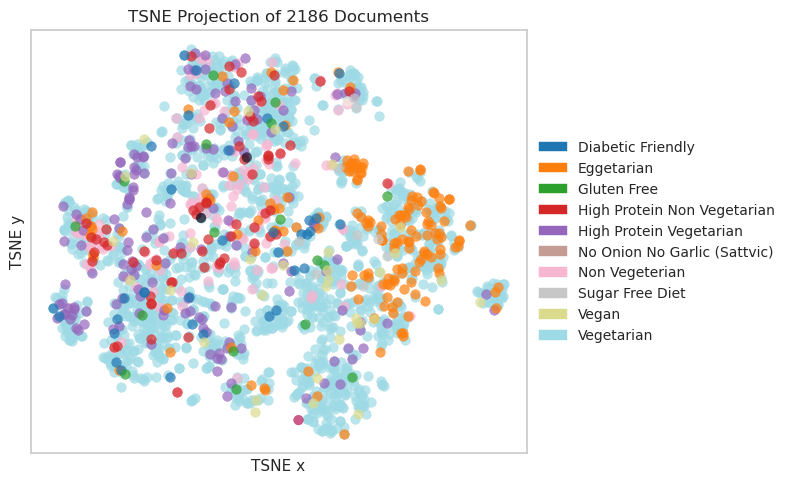

In [64]:
plot_TSNE(TFIDF(),df_final['diet'])

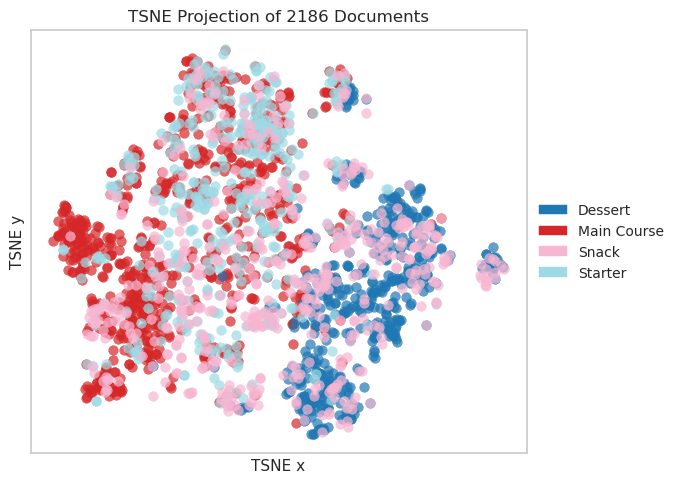

In [65]:
plot_TSNE(TFIDF(),df_final['course_agg'])

### Word2Vec

In [66]:
def word2vec_transform():
    # Train the Word2Vec model
    sentences = [ingredients.split() for ingredients in df_final['ingredients']]
    model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, epochs = 100,seed=42)

    # Transform each paragraph using Word2Vec
    transformed_data = []
    for paragraph in sentences:
        paragraph_vector = np.mean([model.wv[word] for word in paragraph], axis=0)
        transformed_data.append(paragraph_vector)

    # Create a DataFrame from the transformed data
    vocab = [f"feature_{i+1}" for i in range(model.vector_size)]
    data = pd.DataFrame(transformed_data, columns=vocab)

    return data

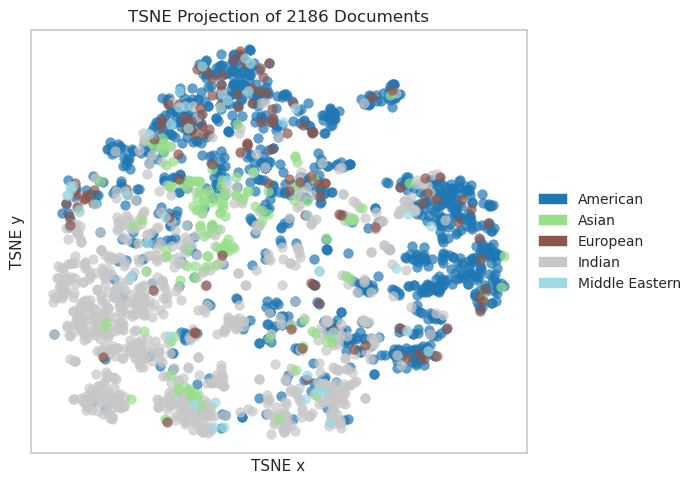

In [67]:
plot_TSNE(word2vec_transform(),df_final['cuisine_agg'])

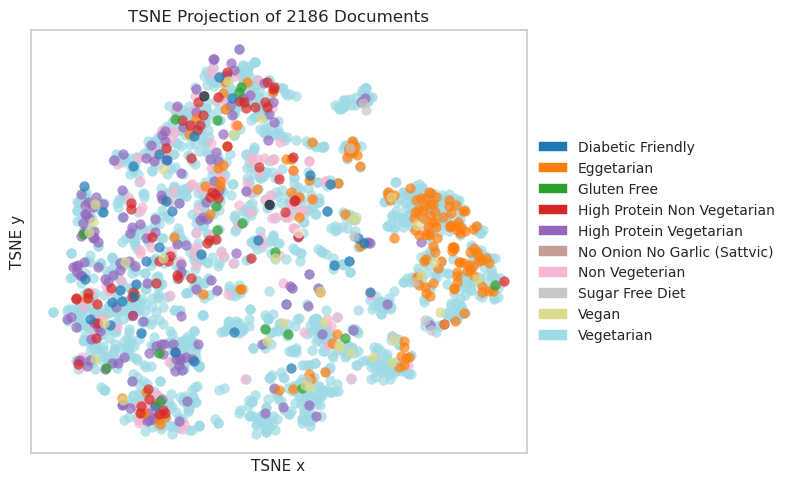

In [68]:
plot_TSNE(word2vec_transform(),df_final['diet'])

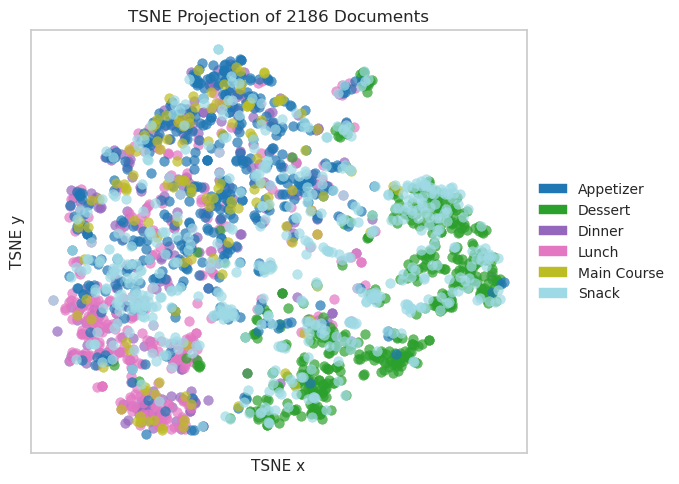

In [69]:
plot_TSNE(word2vec_transform(),df_final['course'])

# Modeling

In [70]:
# One-hot encode the 'cuisine_agg', 'course', and 'diet' features
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df_final[['cuisine_agg', 'course_agg', 'diet']])
# Convert the 'cuisine', 'course', and 'diet' features into numerical form using one-hot encoding
onehot_encoded_cuisine_course_diet = onehot_encoder.transform(df_final[['cuisine_agg', 'course_agg', 'diet']])

### Clustering

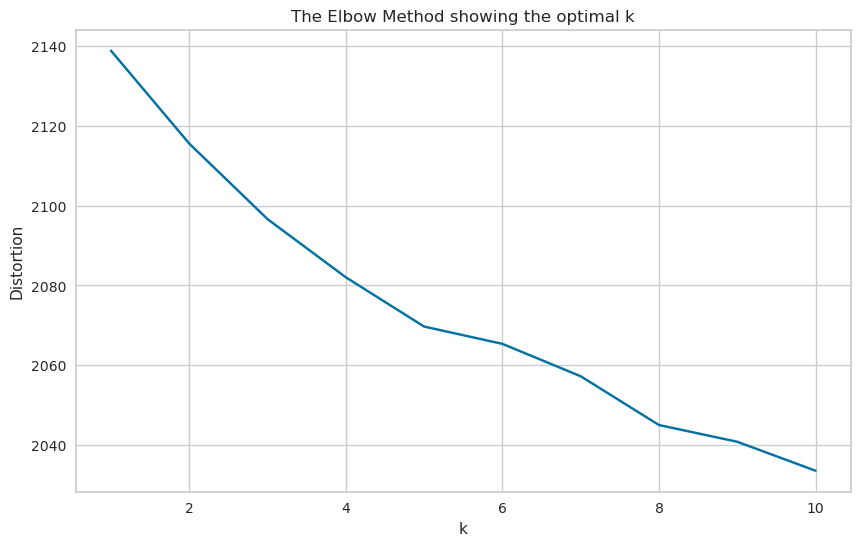

In [71]:
# Elbow method to determine optimal number of clusters
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ingredients_tfidf)
    distortions.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [72]:
# Train the K-means model with the optimal number of clusters
kmeans_optimal_ingredients = KMeans(n_clusters=4, random_state=42)
kmeans_optimal_ingredients.fit(ingredients_tfidf)

# Assign each recipe to a cluster
df_final['cluster_ingredients'] = kmeans_optimal_ingredients.labels_

df_final.head()

,recipe_title,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,category,cuisine_agg,course_agg,ingredients_cleaned,cluster_ingredients
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,is a quicker version pizza to satisfy your cr...,mexican,Dinner,Vegetarian,15,15,tortillas|extra virgin olive oil|garlic|mozzar...,To begin making the Roasted Peppers And Mushro...,Pizza Recipes,American,Main Course,tortillasextra virgin olive oilgarlicmozzarell...,2
1,Barnyard Millet Mushroom Biryani Recipe,is a flavorful one pot preparation made with ...,indian,Lunch,Vegetarian,10,30,barnyard millet|oil|bay leaf tej patta|cardamo...,To begin making the Barnyard Millet Mushroom B...,Biryani Recipes,Indian,Main Course,barnyard milletoilbay leaf tej pattacardamom e...,1
2,Pineapple Upside Down Cake Recipe,The Classic Pineapple Upside Down Cake is simp...,continental,Dessert,Vegetarian,20,40,butter unsalted|caster sugar|whole eggs|all pu...,To begin making the Pineapple Upside Down cake...,Cake Recipes,American,Dessert,butter unsaltedcaster sugarwhole eggsall purpo...,0
3,Cheesy Rice Poppers Recipe,Cheesy Rice Poppers Recipe is a lovely finger ...,continental,Dinner,Vegetarian,10,10,butter salted|garlic|green chillies|onion|gree...,To begin making the Cheesy Rice Poppers Recipe...,Continental Party Appetizer & Starter Recipes,American,Main Course,butter saltedgarlicgreen chilliesoniongreen ca...,0
4,Savory Shrimps On Skillet Recipe,Savory Shrimps on skillet is a recipe where sh...,indian,Appetizer,Non Vegeterian,20,8,shrimps|butter salted|orange color|lemon juice...,To begin making the Savory Shrimps On Skillet ...,Fish Recipes,Indian,Starter,shrimpsbutter saltedorange colorlemon juicehon...,3


### Recommendation System

In [73]:
# Combine the one-hot encoded and TF-IDF vectorized features to create a profile for each recipe
recipe_profiles = hstack([onehot_encoded_cuisine_course_diet, ingredients_tfidf])

# Reset the index of the DataFrame
df_final.reset_index(drop=True, inplace=True)

# Calculate the cosine similarity between recipe profiles
cosine_similarities = cosine_similarity(recipe_profiles)

def recommend_recipes_content_based(recipe_title, df, num_recommendations=5):
    # Convert the recipe title to lowercase and strip any leading or trailing white spaces
    recipe_title = recipe_title.lower().strip()
    
    # Find the index of the given recipe
    recipe_index = df[df['recipe_title'].str.lower().str.strip() == recipe_title].index[0]
    
    # Get the cosine similarities for this recipe
    recipe_similarities = cosine_similarities[recipe_index]
    
    # Get the indices of the recipes sorted by similarity
    similar_recipe_indices = np.argsort(-recipe_similarities)
    
    # Find the cluster of the given recipe
    recipe_cluster = df.loc[recipe_index, 'cluster_ingredients']
    
    # Initialize a list to store the recommended recipes
    recommended_recipes = []
    
    # Iterate over the similar recipe indices
    for index in similar_recipe_indices:
        # Check if the recipe is in the same cluster and is not the given recipe itself
        if (df.loc[index, 'cluster_ingredients'] == recipe_cluster) and (index != recipe_index):
            # Append the recipe to the list of recommendations
            recommended_recipes.append(df.loc[index, 'recipe_title'])
            # If we have enough recommendations, break the loop
            if len(recommended_recipes) >= num_recommendations:
                break
    
    # Convert the list of recommendations into a DataFrame
    df_recommendations = df[df['recipe_title'].isin(recommended_recipes)]
    
    return df_recommendations

In [115]:
# Recommend 5 recipes similar to "Baked Pasta Recipe With Spinach And Artichoke"
recommend_recipes_content_based("Pineapple Upside Down Cake Recipe", df_final)

,recipe_title,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,category,cuisine_agg,course_agg,ingredients_cleaned,cluster_ingredients
21,Eggless Chocolate Mug Cake Recipe - Instant Mi...,"Chocolate Mug Cake Recipe is a quick-fix, inst...",continental,Dessert,Vegetarian,10,1,butter unsalted|cocoa powder|sugar|all purpose...,To begin making the Eggless Chocolate Mug Cake...,Cake Recipes,American,Dessert,butter unsaltedcocoa powdersugarall purpose fl...,0
940,Chocolate Cherry Cake Recipe,Chocolate Cherry Cake Recipe is from Scratch a...,continental,Dessert,Vegetarian,45,15,whole eggs|all purpose flour maida|cocoa powde...,To begin with the Chocolate Cherry Cake From ...,Cake Recipes,American,Dessert,whole eggsall purpose flour maidacocoa powderm...,0
1324,Carrot Cake Parfait With Custard And Strawberr...,Moist chunks of carrot cake (with whole wheat)...,continental,Dessert,Vegetarian,10,40,sugar|brown sugar demerara sugar|sunflower oil...,To begin making the Carrot Cake Parfait With C...,Dessert Recipes,American,Dessert,sugarbrown sugar demerara sugarsunflower oilwh...,0
1986,Eggless Lemon Pound Cake Recipe,The Old Fashioned is a buttery cake perfec...,continental,Dessert,Vegetarian,5,45,butter unsalted|caster sugar|all purpose flour...,"To begin preparing the Lemon Pound Cake, prehe...",Cake Recipes,American,Dessert,butter unsaltedcaster sugarall purpose flour m...,0
2054,Delicious Strawberry Tea Cake Recipe,The Wholesome Strawberry Cake is just the kind...,continental,Dessert,Vegetarian,20,50,butter salted|brown sugar demerara sugar|whole...,To begin making the 50% Whole-Wheat Strawberry...,Cake Recipes,American,Dessert,butter saltedbrown sugar demerara sugarwhole w...,0


### Classification

In [76]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_final['course_agg'])
X = ingredients_tfidf
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))

Accuracy: 60.96%

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       106
           1       0.62      0.72      0.66       155
           2       0.56      0.44      0.49        97
           3       0.42      0.31      0.36        80

    accuracy                           0.61       438
   macro avg       0.58      0.57      0.57       438
weighted avg       0.59      0.61      0.60       438



In [78]:
# SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 59.13%

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       106
           1       0.62      0.68      0.65       155
           2       0.51      0.40      0.45        97
           3       0.38      0.33      0.35        80

    accuracy                           0.59       438
   macro avg       0.56      0.56      0.56       438
weighted avg       0.58      0.59      0.58       438



In [79]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 57.53%

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.74       106
           1       0.61      0.72      0.66       155
           2       0.50      0.35      0.41        97
           3       0.35      0.31      0.33        80

    accuracy                           0.58       438
   macro avg       0.54      0.54      0.53       438
weighted avg       0.56      0.58      0.56       438



In [86]:
def predict_course_by_ingredients(ingredients, model, vectorizer, encoder):
    # Vectorize the provided ingredients
    ingredients_vectorized = vectorizer.transform([ingredients])
    
    # Predict the course's encoded value
    encoded_course = model.predict(ingredients_vectorized)[0]
    
    # Decode the predicted course
    predicted_course = encoder.inverse_transform([encoded_course])[0]
    
    return predicted_course

In [87]:
def clean_input_ingredients(ingredients_input):
    # Clean the input ingredients string
    cleaned_input = clean_ingredients(ingredients_input)
    return cleaned_input

In [89]:
# Test the modified function
ingredients_input = clean_input_ingredients("salad")
predicted_course = predict_course_by_ingredients(ingredients_input, rf, tfidf_vectorizer, label_encoder)
print(f"Predicted Course based on given ingredients: {predicted_course}")


Predicted Course based on given ingredients: Starter


# Error Analysis

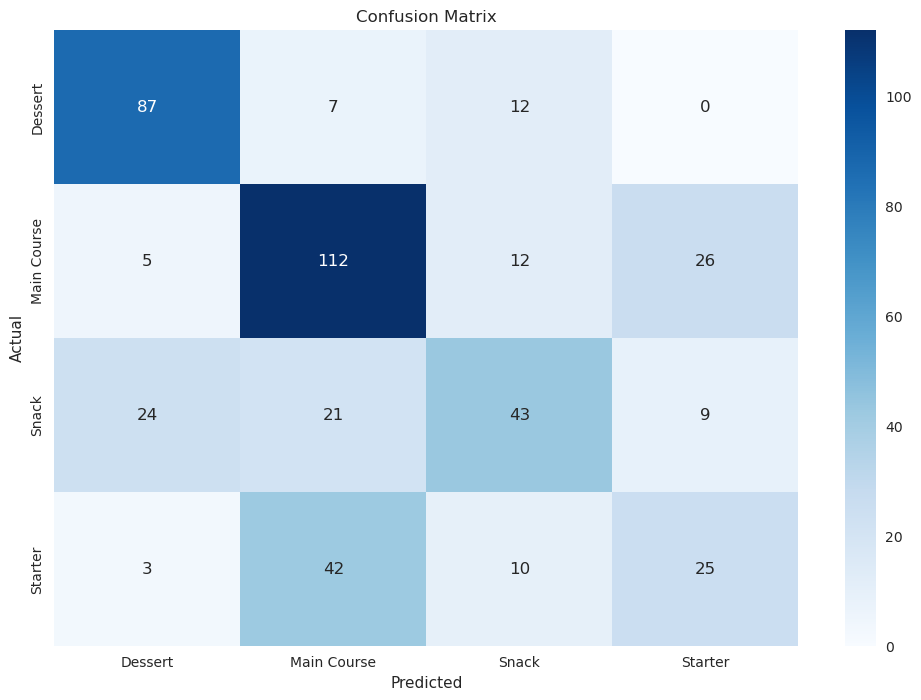

              precision    recall  f1-score   support

     Dessert       0.73      0.82      0.77       106
 Main Course       0.62      0.72      0.66       155
       Snack       0.56      0.44      0.49        97
     Starter       0.42      0.31      0.36        80

    accuracy                           0.61       438
   macro avg       0.58      0.57      0.57       438
weighted avg       0.59      0.61      0.60       438



In [90]:
# Predict the courses on the test data
y_pred = logreg.predict(X_test)

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

In [91]:
# Identify misclassified indices
misclassified_indices = np.where(y_test != y_pred)[0]

# Extract misclassified samples
misclassified_samples = df_final.iloc[misclassified_indices]

# Add columns for actual and predicted courses
misclassified_samples['Actual Course'] = label_encoder.inverse_transform(y_test[misclassified_indices])
misclassified_samples['Predicted Course'] = label_encoder.inverse_transform(y_pred[misclassified_indices])

# Display the misclassified samples with their actual and predicted courses
misclassified_samples[['ingredients', 'Actual Course', 'Predicted Course']]


,ingredients,Actual Course,Predicted Course
2,butter unsalted|caster sugar|whole eggs|all pu...,Dessert,Snack
6,mango ripe|tomato|onion|rajma large kidney bea...,Snack,Main Course
7,black eyed beans lobia|rice|carrots gajjar|gre...,Starter,Main Course
15,potatoes aloo|garlic|fresh thyme leaves|salt,Snack,Dessert
16,chicken|onion|tomato|green chillies|bay leaves...,Snack,Main Course
...,...,...,...
428,all purpose flour maida|red chilli powder|ging...,Snack,Main Course
429,sabudana tapioca pearls|milk|sugar|cardamom po...,Main Course,Snack
431,mango ripe|fresh cream|milk|condensed milk,Snack,Main Course
435,spinach leaves palak|coriander dhania leaves|p...,Main Course,Starter


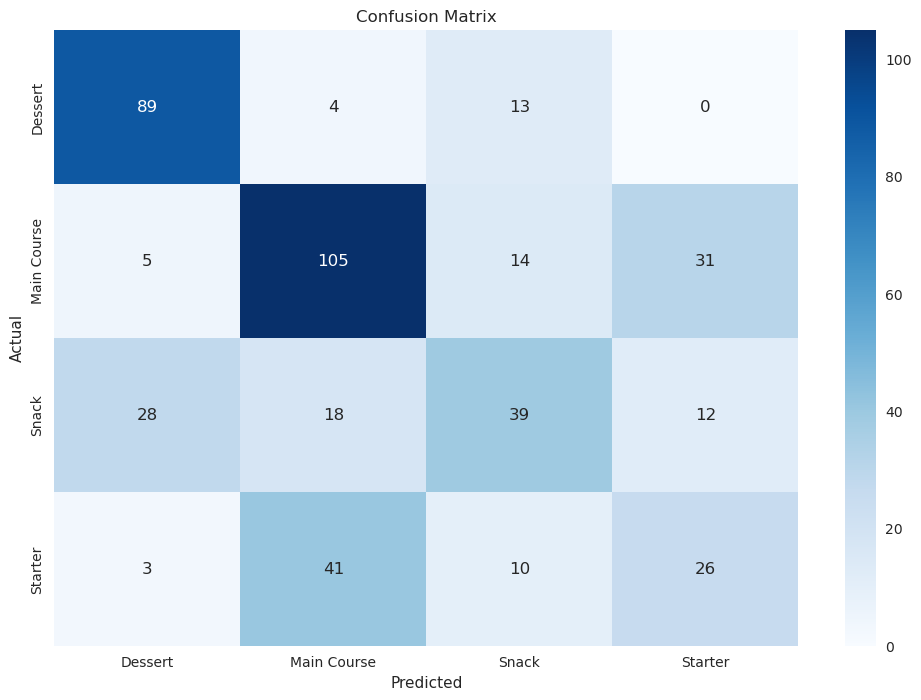

              precision    recall  f1-score   support

     Dessert       0.71      0.84      0.77       106
 Main Course       0.62      0.68      0.65       155
       Snack       0.51      0.40      0.45        97
     Starter       0.38      0.33      0.35        80

    accuracy                           0.59       438
   macro avg       0.56      0.56      0.56       438
weighted avg       0.58      0.59      0.58       438



In [92]:
# Predict the courses on the test data
y_pred = svm.predict(X_test)

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

In [93]:
# Identify misclassified indices
misclassified_indices = np.where(y_test != y_pred)[0]

# Extract misclassified samples
misclassified_samples = df_final.iloc[misclassified_indices]

# Add columns for actual and predicted courses
misclassified_samples['Actual Course'] = label_encoder.inverse_transform(y_test[misclassified_indices])
misclassified_samples['Predicted Course'] = label_encoder.inverse_transform(y_pred[misclassified_indices])

# Display the misclassified samples with their actual and predicted courses
misclassified_samples[['ingredients', 'Actual Course', 'Predicted Course']]


,ingredients,Actual Course,Predicted Course
2,butter unsalted|caster sugar|whole eggs|all pu...,Dessert,Snack
6,mango ripe|tomato|onion|rajma large kidney bea...,Snack,Main Course
7,black eyed beans lobia|rice|carrots gajjar|gre...,Starter,Main Course
15,potatoes aloo|garlic|fresh thyme leaves|salt,Snack,Dessert
16,chicken|onion|tomato|green chillies|bay leaves...,Snack,Main Course
...,...,...,...
430,tortillas|iceberg lettuce|onion|tomato|green b...,Snack,Starter
431,mango ripe|fresh cream|milk|condensed milk,Snack,Main Course
434,bermuda grass powder|ginger|salt|black pepper ...,Starter,Main Course
435,spinach leaves palak|coriander dhania leaves|p...,Main Course,Starter


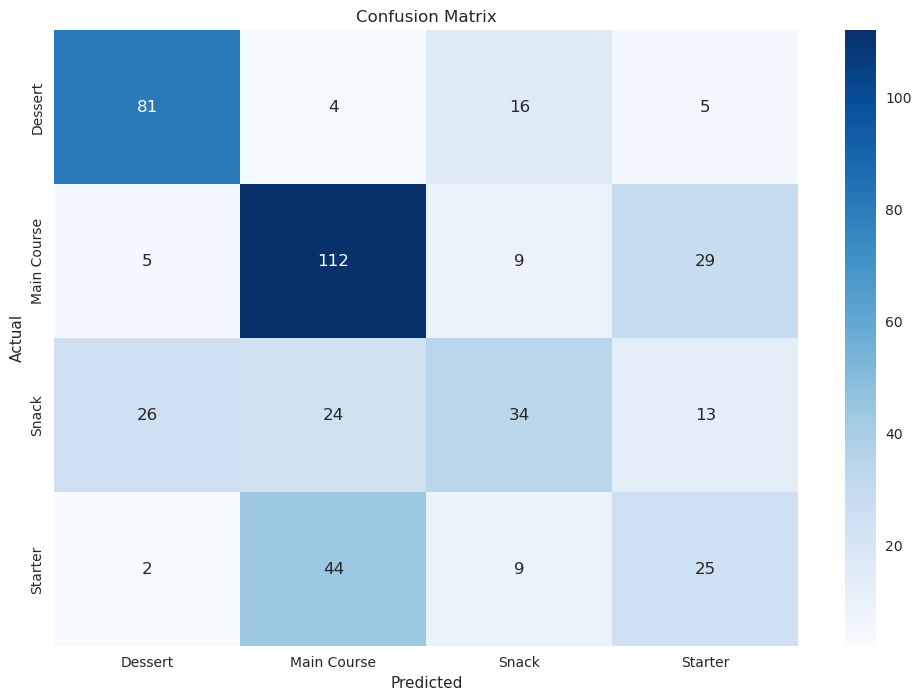

              precision    recall  f1-score   support

     Dessert       0.71      0.76      0.74       106
 Main Course       0.61      0.72      0.66       155
       Snack       0.50      0.35      0.41        97
     Starter       0.35      0.31      0.33        80

    accuracy                           0.58       438
   macro avg       0.54      0.54      0.53       438
weighted avg       0.56      0.58      0.56       438



In [94]:
# Predict the courses on the test data
y_pred = rf.predict(X_test)

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

In [95]:
# Identify misclassified indices
misclassified_indices = np.where(y_test != y_pred)[0]

# Extract misclassified samples
misclassified_samples = df_final.iloc[misclassified_indices]

# Add columns for actual and predicted courses
misclassified_samples['Actual Course'] = label_encoder.inverse_transform(y_test[misclassified_indices])
misclassified_samples['Predicted Course'] = label_encoder.inverse_transform(y_pred[misclassified_indices])

# Display the misclassified samples with their actual and predicted courses
misclassified_samples[['ingredients', 'Actual Course', 'Predicted Course']]


,ingredients,Actual Course,Predicted Course
2,butter unsalted|caster sugar|whole eggs|all pu...,Dessert,Snack
4,shrimps|butter salted|orange color|lemon juice...,Main Course,Dessert
10,sabudana tapioca pearls|shallots|mixed vegetab...,Snack,Starter
15,potatoes aloo|garlic|fresh thyme leaves|salt,Snack,Dessert
16,chicken|onion|tomato|green chillies|bay leaves...,Snack,Main Course
...,...,...,...
429,sabudana tapioca pearls|milk|sugar|cardamom po...,Main Course,Snack
430,tortillas|iceberg lettuce|onion|tomato|green b...,Snack,Main Course
431,mango ripe|fresh cream|milk|condensed milk,Snack,Main Course
435,spinach leaves palak|coriander dhania leaves|p...,Main Course,Starter


# Save Models

In [107]:
# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [108]:
# Save the LabelEncoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [112]:
# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [113]:
# Save the cosine similarities matrix
joblib.dump(cosine_similarities, 'cosine_similarities.pkl')

['cosine_similarities.pkl']

In [111]:
# Save the recipes dataframe for recommendations
df_final.to_csv('recipes_for_recommendation.csv', index=False)

In [105]:
# Save the 'recipe_title' column to a text file
df_final['recipe_title'].to_csv('recipe_titles.txt', index=False, header=False)